In [128]:
from PIL import Image
import rembg


In [129]:
# ouverture de l'image
img = Image.open(r'..\img_test\3037\20240517_135849.jpg')

In [130]:
# Convertir l'image en png
image = img.convert('RGBA')

In [131]:
# suppression du bakground
img_bg_removed = rembg.remove(image)

In [132]:
bbox = img_bg_removed.getbbox()

In [133]:
bbox

(455, 1572, 985, 2417)

In [134]:
image_carre = img.crop((gauche, haut, droite, bas))

In [135]:
image_cropped = img_bg_removed.crop(bbox)

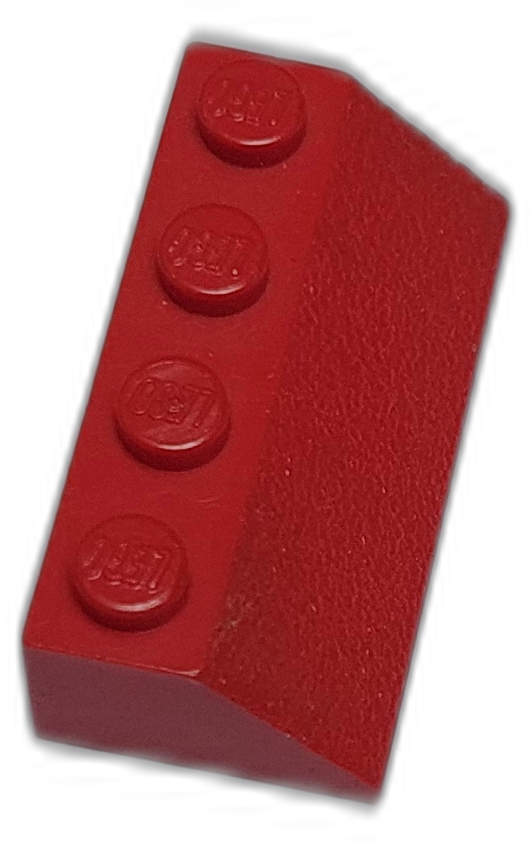

In [136]:
image_cropped

In [137]:
# Obtenir les dimensions de l'image
largeur, hauteur = image.size

# Calculer les coordonnées pour le recadrage
if largeur > hauteur:
    gauche = (largeur - hauteur) // 2
    haut = 0
    droite = gauche + hauteur
    bas = hauteur
else:
    haut = (hauteur - largeur) // 2
    gauche = 0
    bas = haut + largeur
    droite = largeur

# Recadrer l'image pour obtenir un carré
image_carre = image_cropped.crop((gauche, haut, droite, bas))

In [138]:
# redimensionnement de l'Image
new_size = (224, 224)

img_resize = image_cropped.resize(new_size)

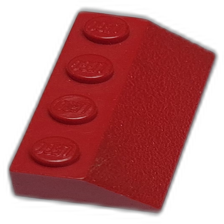

In [139]:
img_resize

In [140]:
# Sauvegarder l'image retravaillée
# img_bg_removed.save('chemin/vers/image_redimensionnee.png')